<a href="https://colab.research.google.com/github/zafarbhbd/grip/blob/master/Sol3_DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Spark Foundation**
**Graduate Rotational Internship Program**

**Data Science and Business Analytics**

# **Task 2**

# **Author: Abu Zafar**

### Workshop - Decision Trees

This workshop deals with understanding the working of decision trees.

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
import warnings as wg
wg.filterwarnings('ignore')

In [ ]:
import os

In [ ]:
path = './drive/MyDrive/Data/Iris.csv'

In [ ]:
data = pd.read_csv(path)

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
list(data.columns)

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [ ]:
# Forming the iris dataframe
flower =pd.DataFrame(data)
flower_dataframe= flower.drop(columns=["Id", "Species"])
print(flower_dataframe.head(5))
print(flower_dataframe.tail(5))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8


In [ ]:
within_cluster_ss = []
c_range = range(1,8)
for k in c_range:
  km = KMeans(n_clusters= k)
  km = km.fit(flower_dataframe)
  within_cluster_ss.append(km.inertia_)

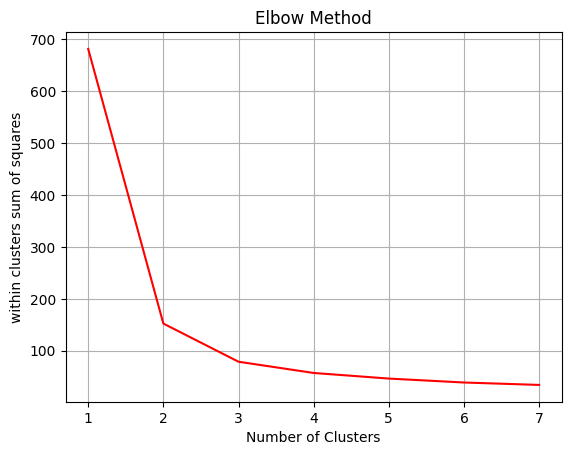

In [ ]:
plt.plot(c_range, within_cluster_ss, color = 'red')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('within clusters sum of squares')
plt.grid()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
pred = model.fit_predict(flower_dataframe)

# **Data Visualization**

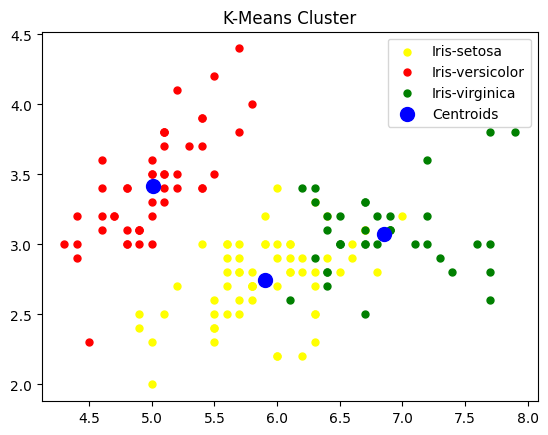

In [ ]:
x = flower_dataframe.iloc[:,[0, 1, 2, 3]].values
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], s = 25, c= 'Yellow', label = 'Iris-setosa')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], s = 25, c= 'Red', label = 'Iris-versicolor')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1], s = 25, c= 'Green', label = 'Iris-virginica')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],s = 100, c = 'Blue', label = 'Centroids')
plt.title('K-Means Cluster')
plt.legend()
plt.show()

**This way, we have predicted the optimal number of clusters and their visual representation.**